In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
data=pd.read_csv('food_orders_new_delhi (1).csv')
data


,Order ID,Customer ID,Restaurant ID,Order Date and Time,Delivery Date and Time,Order Value,Delivery Fee,Payment Method,Discounts and Offers,Commission Fee,Payment Processing Fee,Refunds/Chargebacks
0,1,C8270,R2924,2024-02-01 01:11:52,2024-02-01 02:39:52,1914,0,Credit Card,5% on App,150,47,0
1,2,C1860,R2054,2024-02-02 22:11:04,2024-02-02 22:46:04,986,40,Digital Wallet,10%,198,23,0
2,3,C6390,R2870,2024-01-31 05:54:35,2024-01-31 06:52:35,937,30,Cash on Delivery,15% New User,195,45,0
3,4,C6191,R2642,2024-01-16 22:52:49,2024-01-16 23:38:49,1463,50,Cash on Delivery,NaN,146,27,0
4,5,C6734,R2799,2024-01-29 01:19:30,2024-01-29 02:48:30,1992,30,Cash on Delivery,50 off Promo,130,50,0
...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,C6232,R2129,2024-01-14 05:57:00,2024-01-14 06:39:00,825,0,Digital Wallet,5% on App,165,47,50
996,997,C6797,R2742,2024-01-28 08:50:43,2024-01-28 10:10:43,1627,50,Cash on Delivery,NaN,110,42,0
997,998,C5926,R2837,2024-01-21 09:43:19,2024-01-21 10:44:19,553,20,Cash on Delivery,NaN,64,31,0
998,999,C7016,R2144,2024-01-30 22:23:38,2024-01-31 00:07:38,1414,0,Cash on Delivery,15% New User,199,34,0


In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
data.isnull().sum()

Order ID                    0
Customer ID                 0
Restaurant ID               0
Order Date and Time         0
Delivery Date and Time      0
Order Value                 0
Delivery Fee                0
Payment Method              0
Discounts and Offers      185
Commission Fee              0
Payment Processing Fee      0
Refunds/Chargebacks         0
dtype: int64

In [4]:
# Clean the dataset by replacing missing values in 'Discounts and Offers' with 'No Discount'
data_cleaned = data.copy()
data_cleaned['Discounts and Offers'].fillna('No Discount', inplace=True)

# Descriptive statistics and frequency analysis
univariate_stats_cleaned = data_cleaned.describe()

# Frequency counts for categorical variables
payment_method_counts_cleaned = data_cleaned['Payment Method'].value_counts()
discounts_offers_counts_cleaned = data_cleaned['Discounts and Offers'].value_counts()

# Correlation matrix between numerical variables
correlation_matrix_cleaned = data_cleaned[['Order Value', 'Delivery Fee', 'Commission Fee', 'Payment Processing Fee', 'Refunds/Chargebacks']].corr()

# Group by analysis for Discounts/Offers and Payment Method
order_value_by_discount_cleaned = data_cleaned.groupby('Discounts and Offers')['Order Value'].mean()
order_value_by_payment_method_cleaned = data_cleaned.groupby('Payment Method')['Order Value'].mean()

# Analyze Refunds/Chargebacks by Payment Method
refunds_by_payment_method_cleaned = data_cleaned.groupby('Payment Method')['Refunds/Chargebacks'].sum()

# Return the results
(univariate_stats_cleaned, payment_method_counts_cleaned, discounts_offers_counts_cleaned, correlation_matrix_cleaned, 
 order_value_by_discount_cleaned, order_value_by_payment_method_cleaned, refunds_by_payment_method_cleaned)


(          Order ID  Order Value  Delivery Fee  Commission Fee  \
 count  1000.000000  1000.000000   1000.000000      1000.00000   
 mean    500.500000  1053.969000     28.620000       126.99000   
 std     288.819436   530.975339     16.958278        43.06405   
 min       1.000000   104.000000      0.000000        50.00000   
 25%     250.750000   597.750000     20.000000        90.00000   
 50%     500.500000  1038.500000     30.000000       127.00000   
 75%     750.250000  1494.000000     40.000000       164.00000   
 max    1000.000000  1995.000000     50.000000       200.00000   
 
        Payment Processing Fee  Refunds/Chargebacks  
 count             1000.000000          1000.000000  
 mean                29.832000            28.300000  
 std                 11.627165            49.614228  
 min                 10.000000             0.000000  
 25%                 20.000000             0.000000  
 50%                 30.000000             0.000000  
 75%                 40.00

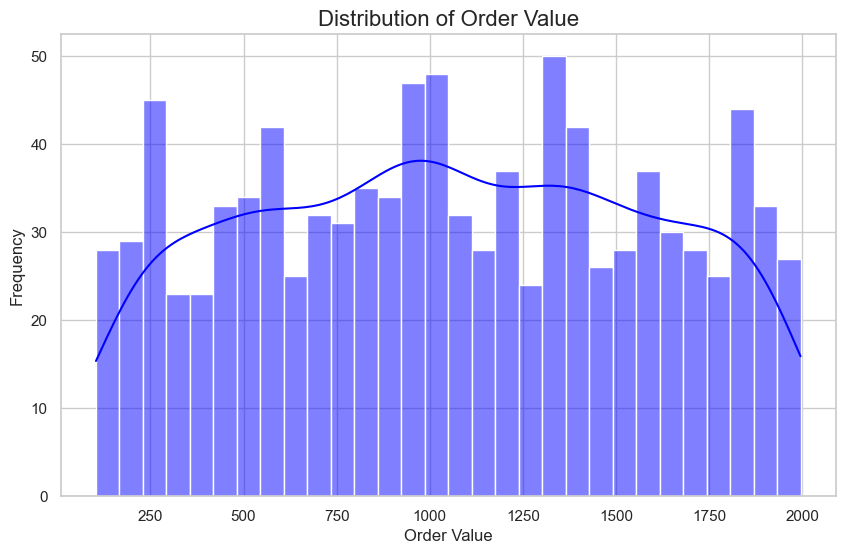

In [5]:
# 1. Distribution of Order Value
plt.figure(figsize=(10, 6))
sns.histplot(data['Order Value'], kde=True, color='blue', bins=30)
plt.title('Distribution of Order Value', fontsize=16)
plt.xlabel('Order Value', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(True)
plt.show()

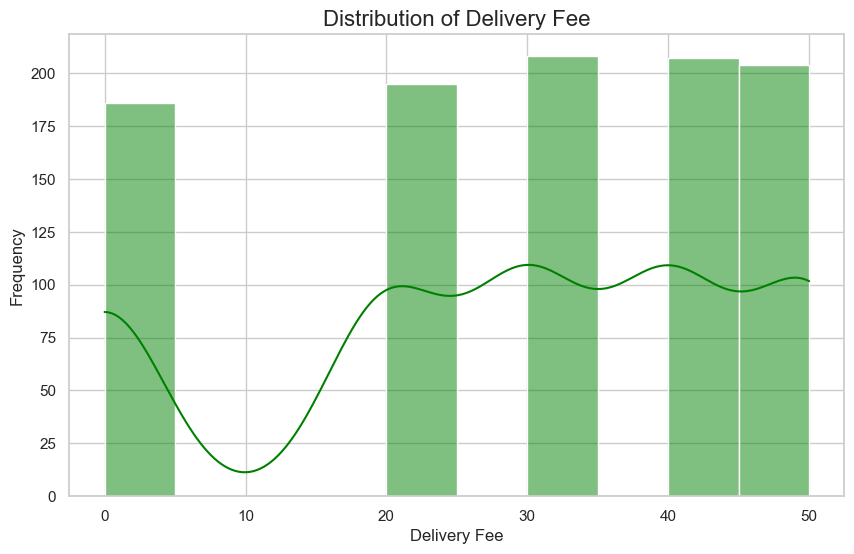

In [6]:
# 2. Delivery Fee Distribution
plt.figure(figsize=(10, 6))
sns.histplot(data['Delivery Fee'], kde=True, color='green', bins=10)
plt.title('Distribution of Delivery Fee', fontsize=16)
plt.xlabel('Delivery Fee', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(True)
plt.show()

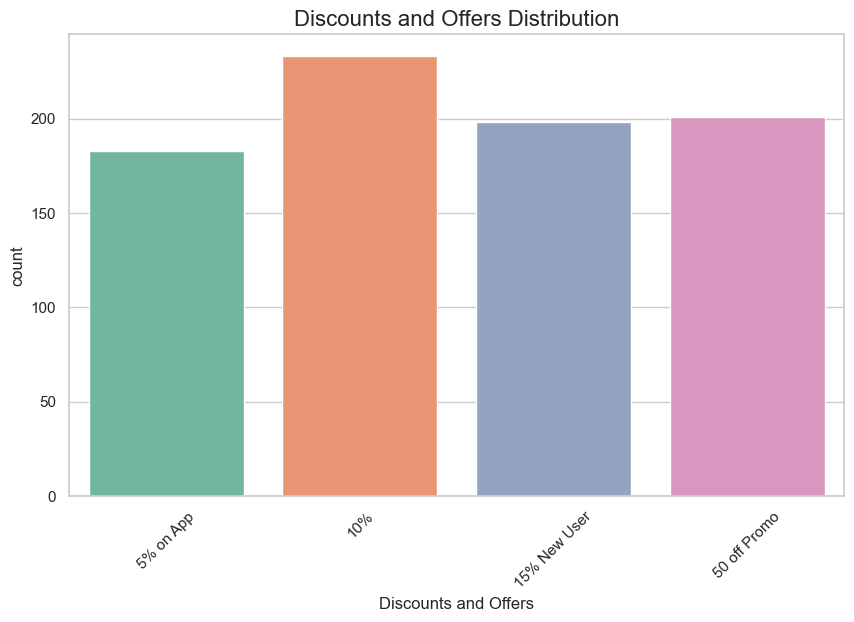

In [7]:
# 3. Discounts and Offers Distribution (Bar Plot)
plt.figure(figsize=(10, 6))
sns.countplot(x='Discounts and Offers', data=data, palette='Set2')
plt.title('Discounts and Offers Distribution', fontsize=16)
plt.xticks(rotation=45)
plt.show()

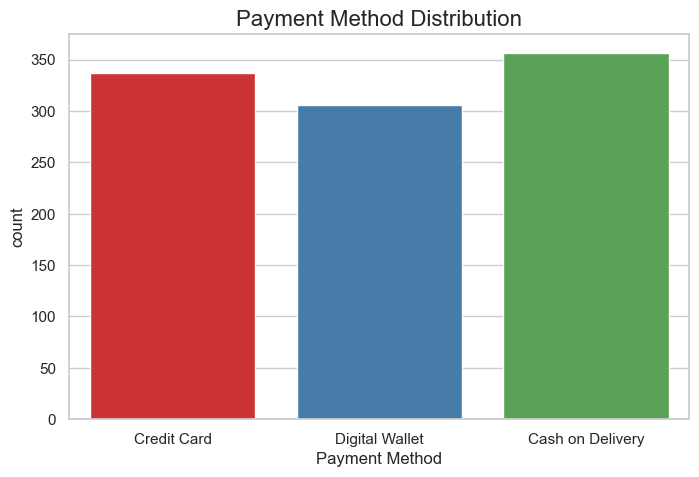

In [8]:
# 4. Payment Method Distribution (Bar Plot)
plt.figure(figsize=(8, 5))
sns.countplot(x='Payment Method', data=data, palette='Set1')
plt.title('Payment Method Distribution', fontsize=16)
plt.show()

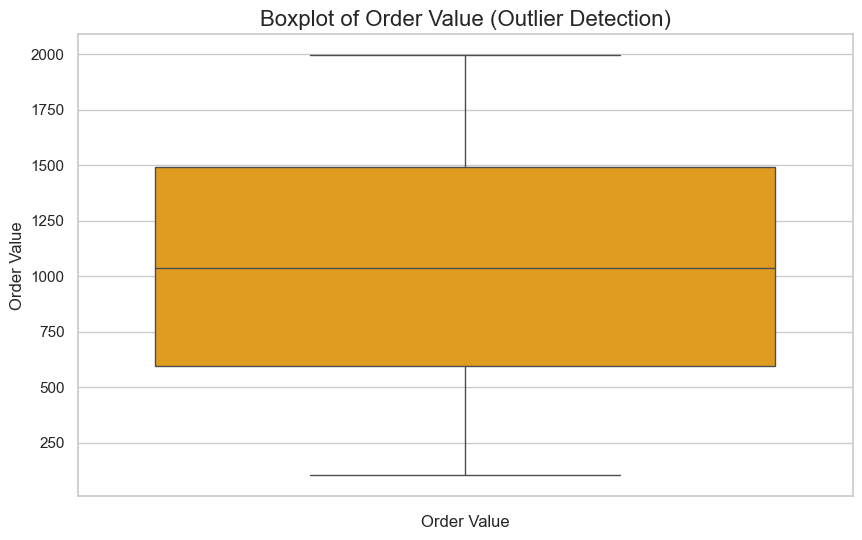

In [9]:
# Boxplot for detecting outliers in 'Order Value'
plt.figure(figsize=(10, 6))
sns.boxplot(data['Order Value'], color='orange')
plt.title('Boxplot of Order Value (Outlier Detection)', fontsize=16)
plt.xlabel('Order Value', fontsize=12)
plt.show()

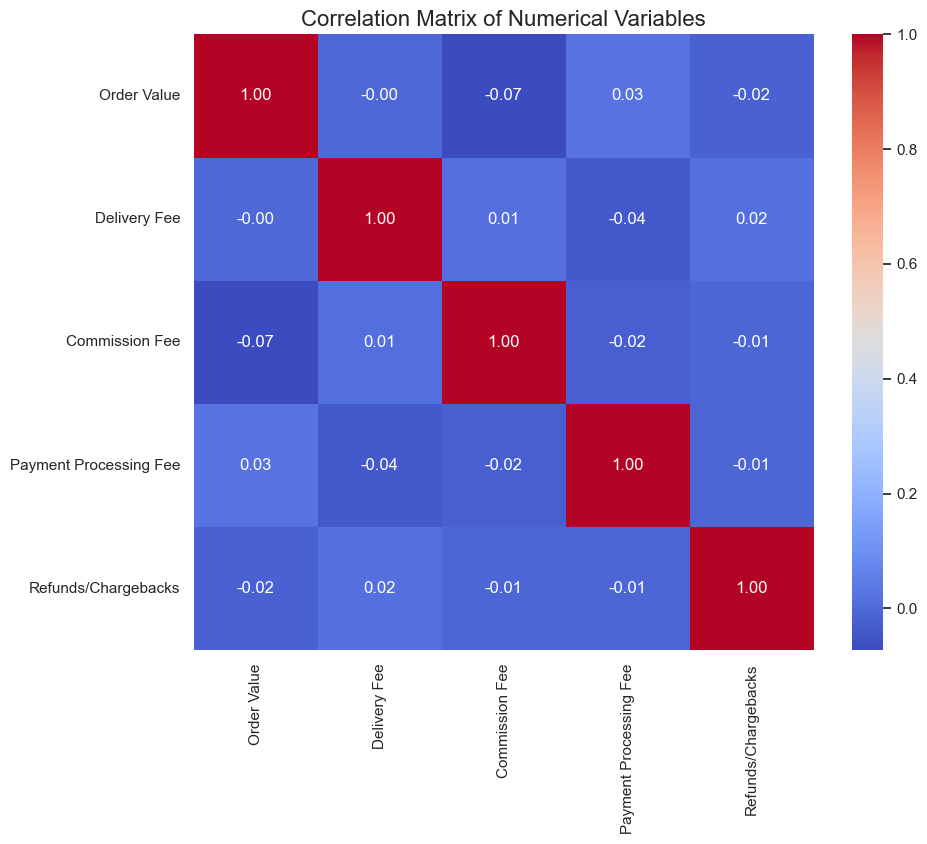

In [10]:
# 1. Correlation Matrix Heatmap for numerical variables
plt.figure(figsize=(10, 8))
correlation_matrix = data[['Order Value', 'Delivery Fee', 'Commission Fee', 'Payment Processing Fee', 'Refunds/Chargebacks']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Variables', fontsize=16)
plt.show()

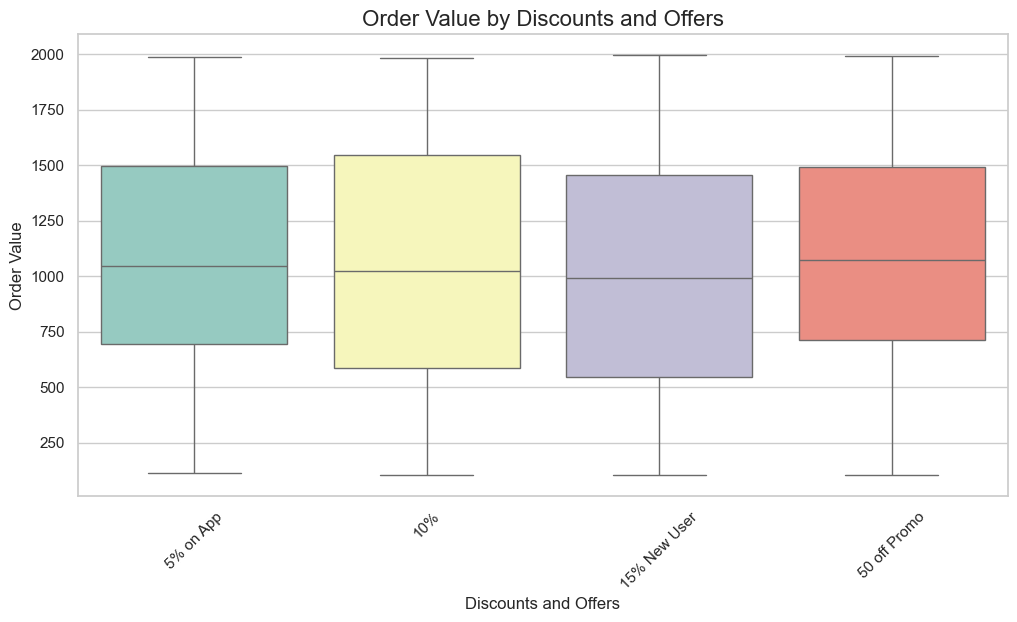

In [11]:
# 2. Boxplot: Order Value by Discounts and Offers
plt.figure(figsize=(12, 6))
sns.boxplot(x='Discounts and Offers', y='Order Value', data=data, palette='Set3')
plt.title('Order Value by Discounts and Offers', fontsize=16)
plt.xticks(rotation=45)
plt.show()

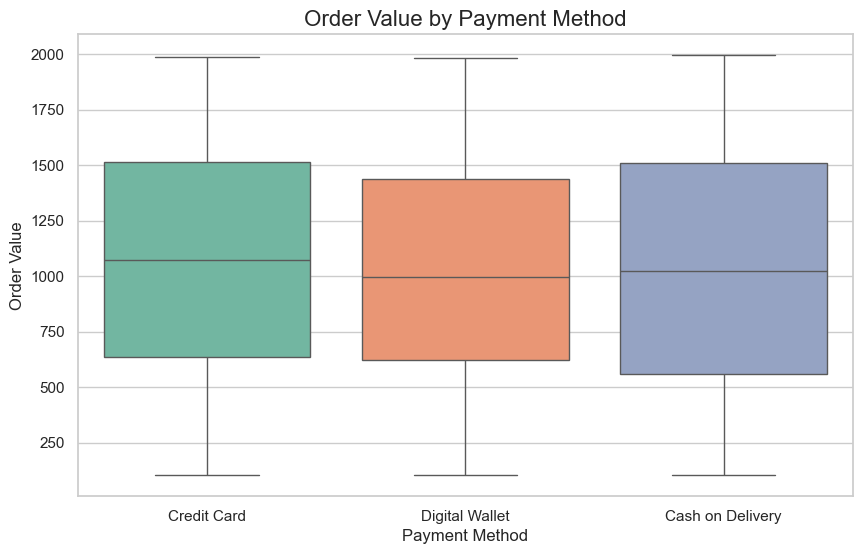

In [12]:
# 3. Boxplot: Order Value by Payment Method
plt.figure(figsize=(10, 6))
sns.boxplot(x='Payment Method', y='Order Value', data=data, palette='Set2')
plt.title('Order Value by Payment Method', fontsize=16)
plt.show()

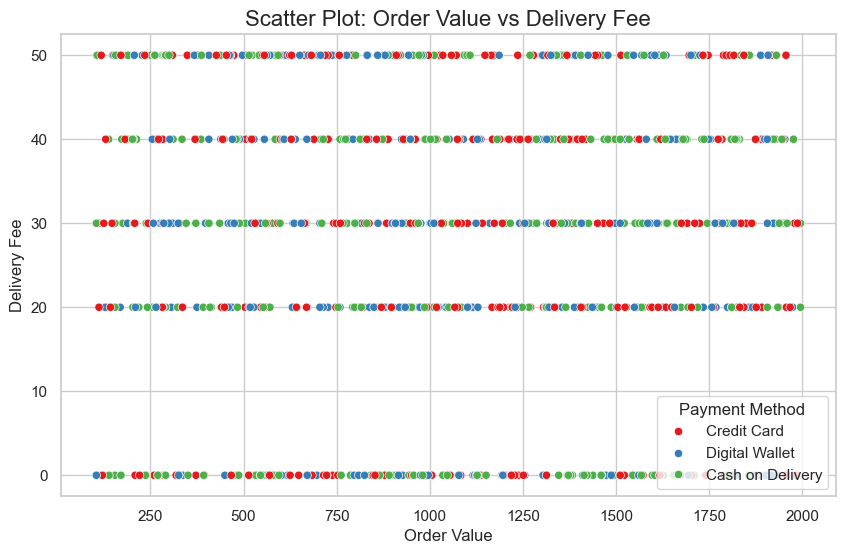

In [13]:
# 4. Scatter Plot: Delivery Fee vs. Order Value
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Order Value', y='Delivery Fee', data=data, hue='Payment Method', palette='Set1')
plt.title('Scatter Plot: Order Value vs Delivery Fee', fontsize=16)
plt.grid(True)
plt.show()

In [14]:
# 1. Group by 'Discounts and Offers' to see average order value
order_value_by_discount = data.groupby('Discounts and Offers')['Order Value'].mean()
print("\nAverage Order Value by Discounts and Offers:\n", order_value_by_discount)


Average Order Value by Discounts and Offers:
 Discounts and Offers
10%             1053.755365
15% New User    1008.070707
5% on App       1065.316940
50 off Promo    1094.706468
Name: Order Value, dtype: float64


In [15]:
# 2. Group by 'Payment Method' to see average order value
order_value_by_payment_method = data.groupby('Payment Method')['Order Value'].mean()
print("\nAverage Order Value by Payment Method:\n", order_value_by_payment_method)


Average Order Value by Payment Method:
 Payment Method
Cash on Delivery    1049.492997
Credit Card         1071.833828
Digital Wallet      1039.516340
Name: Order Value, dtype: float64


In [16]:
# 3. Group by 'Payment Method' to sum total Refunds/Chargebacks
refunds_by_payment_method = data.groupby('Payment Method')['Refunds/Chargebacks'].sum()
print("\nTotal Refunds/Chargebacks by Payment Method:\n", refunds_by_payment_method)


Total Refunds/Chargebacks by Payment Method:
 Payment Method
Cash on Delivery    10400
Credit Card         10400
Digital Wallet       7500
Name: Refunds/Chargebacks, dtype: int64


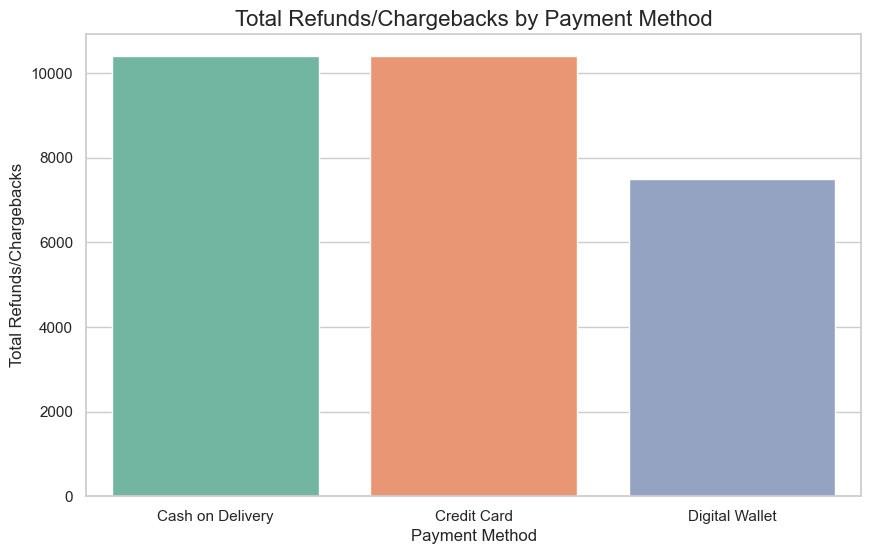

In [17]:
# 4. Visualization: Total Refunds/Chargebacks by Payment Method (Bar Plot)
plt.figure(figsize=(10, 6))
sns.barplot(x=refunds_by_payment_method.index, y=refunds_by_payment_method.values, palette='Set2')
plt.title('Total Refunds/Chargebacks by Payment Method', fontsize=16)
plt.xlabel('Payment Method', fontsize=12)
plt.ylabel('Total Refunds/Chargebacks', fontsize=12)
plt.show()

In [18]:
# 4.4 Delivery Fee and Order Value Relationship (Correlation)
delivery_order_corr = data[['Order Value', 'Delivery Fee']].corr().iloc[0, 1]
print("\nCorrelation between Order Value and Delivery Fee: ", delivery_order_corr)


Correlation between Order Value and Delivery Fee:  -0.0030685361322858257


In [19]:
from scipy import stats

# Example: Compare Order Value between 'Credit Card' and 'Cash on Delivery'
group1 = data[data['Payment Method'] == 'Credit Card']['Order Value']
group2 = data[data['Payment Method'] == 'Cash on Delivery']['Order Value']

# Perform independent t-test
t_stat, p_val = stats.ttest_ind(group1, group2, nan_policy='omit')

print(f"t-statistic: {t_stat}, p-value: {p_val}")


t-statistic: 0.5451070005942611, p-value: 0.5858555660790865


In [20]:
# Create a contingency table
contingency_table = pd.crosstab(data['Payment Method'], data['Discounts and Offers'])

# Perform chi-square test
chi2_stat, p_val, dof, expected = stats.chi2_contingency(contingency_table)

print(f"Chi-square statistic: {chi2_stat}, p-value: {p_val}")


Chi-square statistic: 5.213270358277455, p-value: 0.5167651276500251


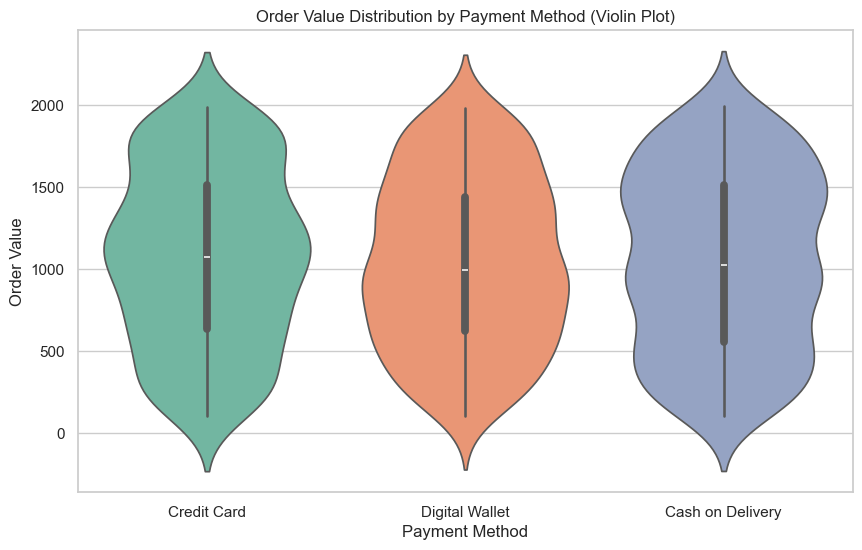

In [21]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='Payment Method', y='Order Value', data=data, palette='Set2')
plt.title('Order Value Distribution by Payment Method (Violin Plot)')
plt.xlabel('Payment Method')
plt.ylabel('Order Value')
plt.show()


In [24]:
# Perform ANOVA test
anova_result = stats.f_oneway(
    data[data['Discounts and Offers'] == '10%']['Order Value'],
    data[data['Discounts and Offers'] == '50 off Promo']['Order Value'],
    data[data['Discounts and Offers'] == '15% New User']['Order Value'],
    data[data['Discounts and Offers'] == '5% on App']['Order Value'],
    data[data['Discounts and Offers'] == 'No Discount']['Order Value']
)

print(f"ANOVA F-statistic: {anova_result.statistic}, p-value: {anova_result.pvalue}")


ANOVA F-statistic: nan, p-value: nan


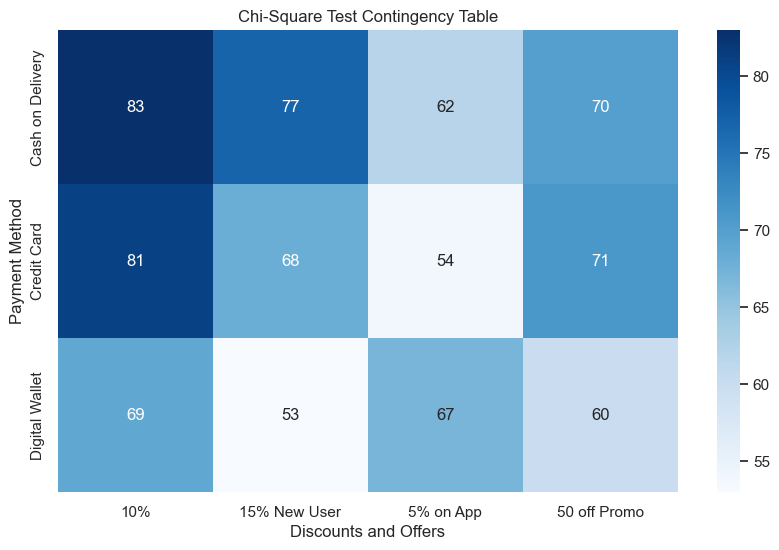

In [25]:
# Chi-Square Test Visualization (Heatmap)
plt.figure(figsize=(10, 6))
sns.heatmap(contingency_table, annot=True, cmap='Blues', fmt='d')
plt.title('Chi-Square Test Contingency Table')
plt.xlabel('Discounts and Offers')
plt.ylabel('Payment Method')
plt.show()

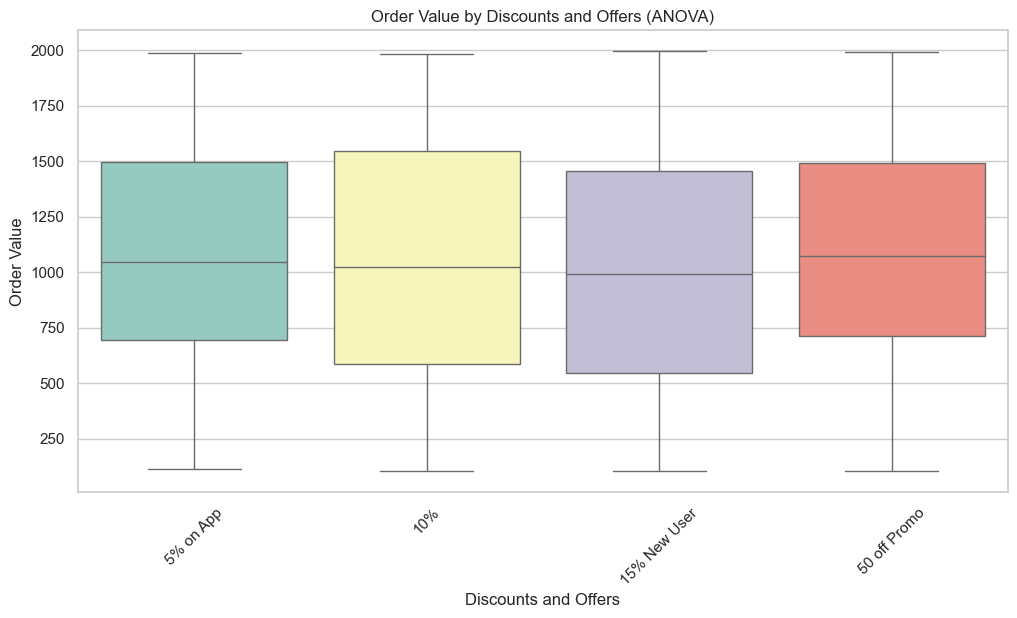

In [28]:
# ANOVA Test Visualization (Boxplot)
plt.figure(figsize=(12, 6))
sns.boxplot(x='Discounts and Offers', y='Order Value', data=data, palette='Set3')
plt.title('Order Value by Discounts and Offers (ANOVA)')
plt.ylabel('Order Value')
plt.xticks(rotation=45)
plt.show()

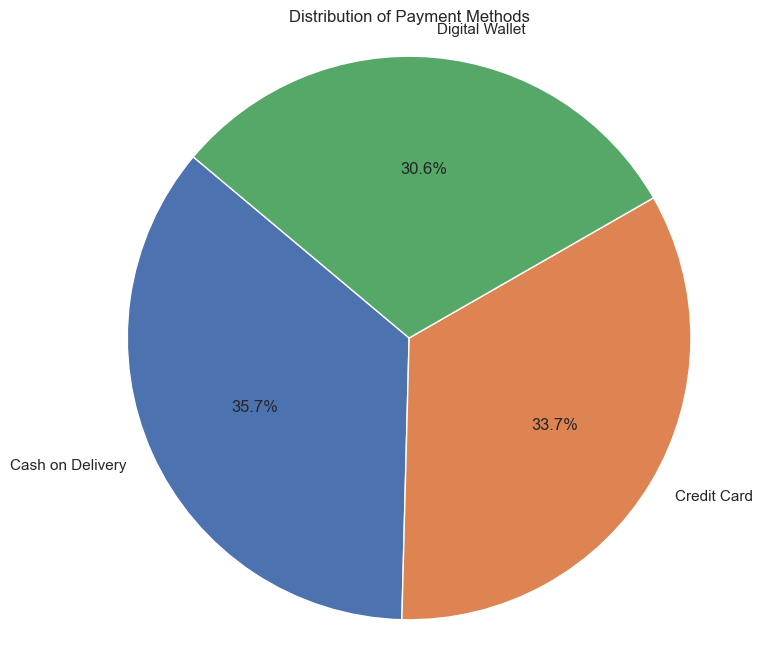

In [30]:
plt.figure(figsize=(8, 8))
payment_counts = data['Payment Method'].value_counts()
plt.pie(payment_counts, labels=payment_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Payment Methods')
plt.axis('equal')  # Equal aspect ratio ensures that pie chart is circular.
plt.show()

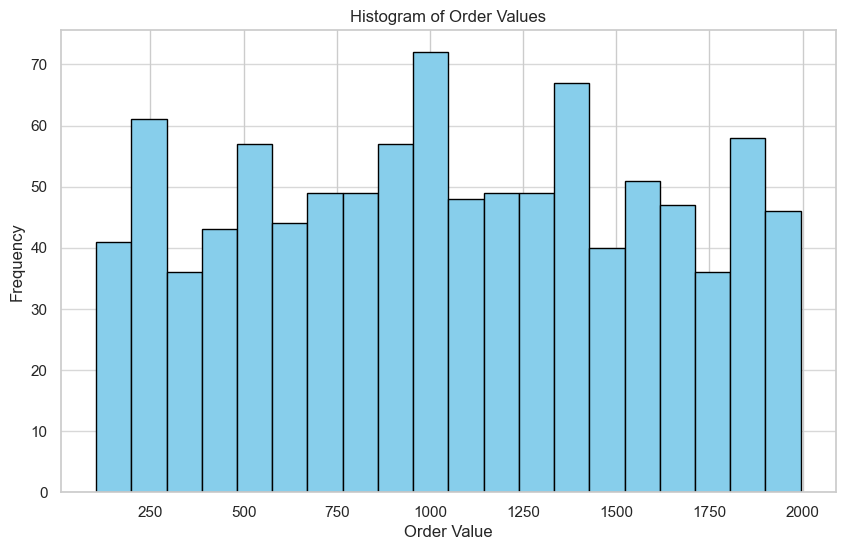

In [31]:
plt.figure(figsize=(10, 6))
plt.hist(data['Order Value'], bins=20, color='skyblue', edgecolor='black')
plt.title('Histogram of Order Values')
plt.xlabel('Order Value')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()